# Pressure plotting script



In [1]:
# data mining
import math
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import glob
from itertools import cycle


In [2]:
# Folder Path
path = "."
os.chdir(path)

# Colors
cycol = cycle('bgrcmk')

In [3]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        return lines


In [4]:
def delete_less_than_k(arr,k):
    temp = [] #Temporary list
    for val in arr:#Iterating the list arr
        if val>=k:
            temp.append(val)
    #All the elements whose value is less than k are stored in temp
    return temp

def average(n_blocks, data, omit):
    data = delete_less_than_k(data, 0)
    block_avgs = []
    block_len = int(len(data) * (1-omit)) // n_blocks
    i = int(len(data) * omit)
    for i in range(n_blocks):
        block = data[i:(i + block_len)]
        mean = np.mean(block)
        block_avgs.append(mean)
        i += block_len
    return np.mean(block_avgs), np.std(block_avgs)

def get_indexes(x, y):
    indexes = []
    for i in range(x):
        for j in range(y):
            indexes.append([i, j])
    return indexes

def get_pressures(file, path):
    timesteps = []
    pressures = []

    file_path = f"{path}/{file}"
    lines = read_text_file(file_path)
    for line in lines:
        tokens = line.split(",")
        token = tokens[4].split("\n")[0]
        timesteps.append(float(tokens[0]))
        token = token.split('.')[0]+"."+token.split('.')[1][0:4]
        pressures.append(float(token))

    return timesteps, pressures

def get_log_data(file, path):
    parameters = {}

    file_path = f"{path}/{file}"
    with open(file_path, 'r') as f:
        line = f.readline()
        while (line.split(" "))[0].split(":")[0] != "npart":
            line = f.readline()
        line.strip()
        temp = line.split(" ")
        for t in temp:
            key, value = t.split(":")
            parameters[key] = value.rstrip()

    del parameters["npart"]
    return parameters

def pressure_subplots(x, y, fsize=20, title="Lennard Jones Liquid Simulation"):
    # Generate indexes for subplot grid
    indexes = get_indexes(x, y)

    # Set base data
    figure, axis = plt.subplots(x, y, figsize=(fsize,fsize))
    figure.suptitle(title)

    # Keep track of n of subplots
    subplot_count = 0

    with open("out.txt", 'w') as o:
        for file in os.listdir():
            if file.endswith(".obs"):
                filename = file.title().split(".")[0]
                parameters = get_log_data(f"{filename.lower()}.log", path)
                timesteps, pressures = get_pressures(file, path)


                t = np.array(timesteps)
                p = np.array(pressures)
                avg, std = average(8, pressures, 0)
                o.write(f"{float(parameters['density'])};{float(parameters['kT'])};{avg};{std}\n")
                # Plot the data
                axis[indexes[subplot_count][0], indexes[subplot_count][1]].plot(t, p)
                axis[indexes[subplot_count][0], indexes[subplot_count][1]].axhline(avg, color='red', linestyle='--')

                # Set title
                axis[indexes[subplot_count][0], indexes[subplot_count][1]].set_title(f'{parameters}, AVG: {round(avg, 4)}, STD: {round(std, 4)}')
                # Name the axes
                axis[indexes[subplot_count][0], indexes[subplot_count][1]].set_xlabel("Timesteps")
                axis[indexes[subplot_count][0], indexes[subplot_count][1]].set_ylabel("Pressure [kT/A^3]")

                # Clear data for next subplot
                timesteps.clear()
                pressures.clear()




                subplot_count+=1
                # Stop if maximum number of plots in the grid has been reached
                if subplot_count == len(indexes):
                    break
    plt.show()

In [5]:
obs_count = len(glob.glob1(".","*.obs"))
grid = int(math.ceil(math.sqrt(obs_count)))

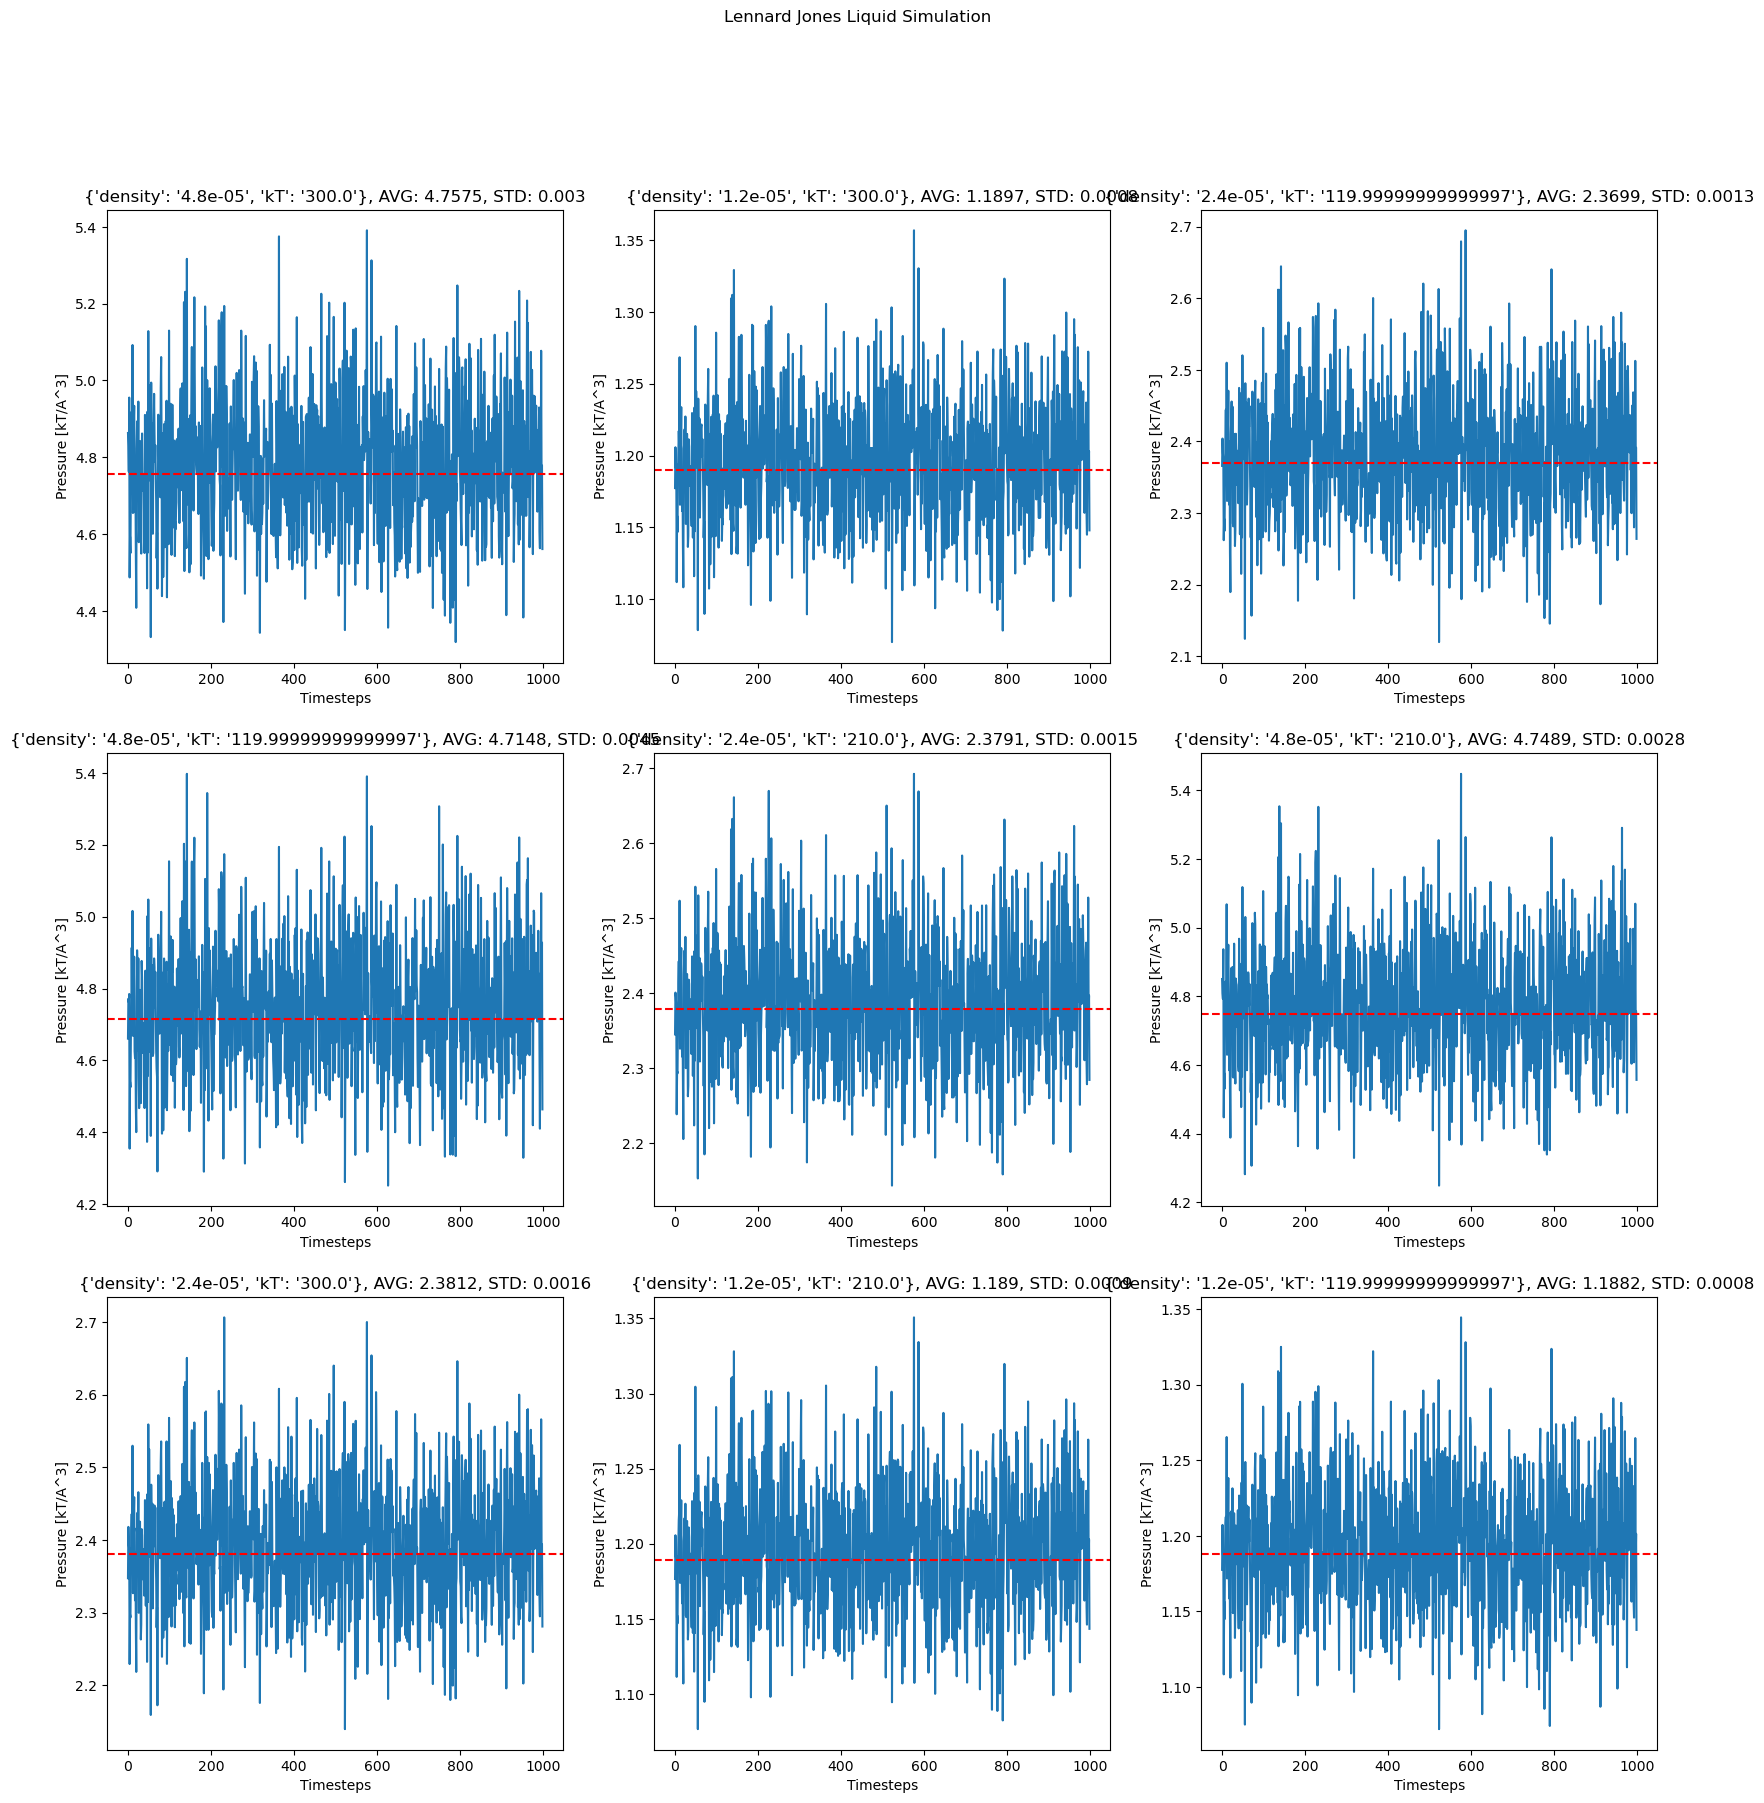

In [6]:
pressure_subplots(3, 3)